                                                BASIC STATISTICS                                                        

Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

Introduction                                 
●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis


Descriptive Analytics for Numerical Columns   

●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

●	Steps:       
	--> Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).       
	--> Identify numerical columns in the dataset.                  
	--> Calculate the mean, median, mode, and standard deviation for these columns.                   
	--> Provide a brief interpretation of these statistics.                  


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns 
print("Numerical columns are:", list(num_cols))

Numerical columns are: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [14]:
mean = df[num_cols].mean()
median = df[num_cols].median()
mode = df[num_cols].mode().iloc[0]  
std = df[num_cols].std()

In [15]:
summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Standard Deviation': std
})
summary_stats

,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


A brief interpretation of these statistics



Mean shows the average value. For example, if total sales mean is ₹500, most sales are around this value.              
                                                                       
Median is the middle value, which is useful when there are very high or low numbers. For example, a 10% discount median means half the sales had discounts below 10%.                                                              
                                                                        
Mode is the most common value. If quantity sold mode is 5, most customers buy 5 items.                                
                                                                
Standard Deviation shows how much values vary. Low std means consistent sales, high std means more variation.       

                                              Data Visualization                                                       

●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

●	Histograms:

--> Plot histograms for each numerical column.       
--> Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences    


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

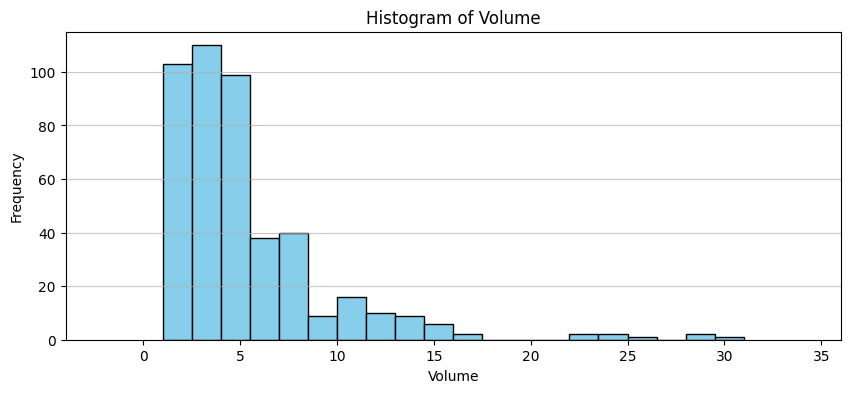

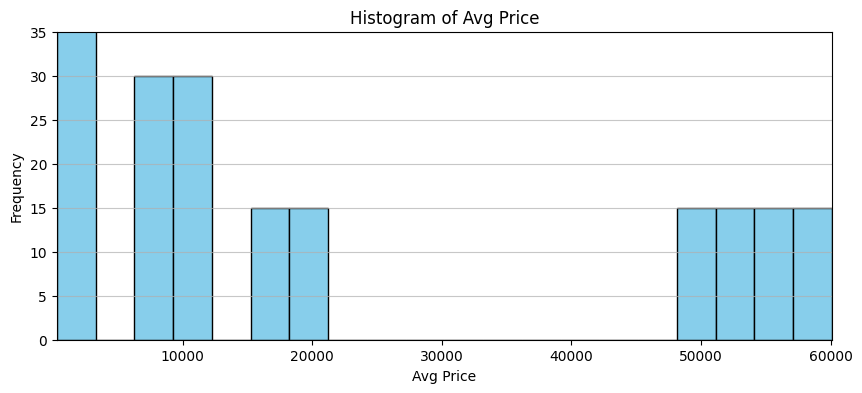

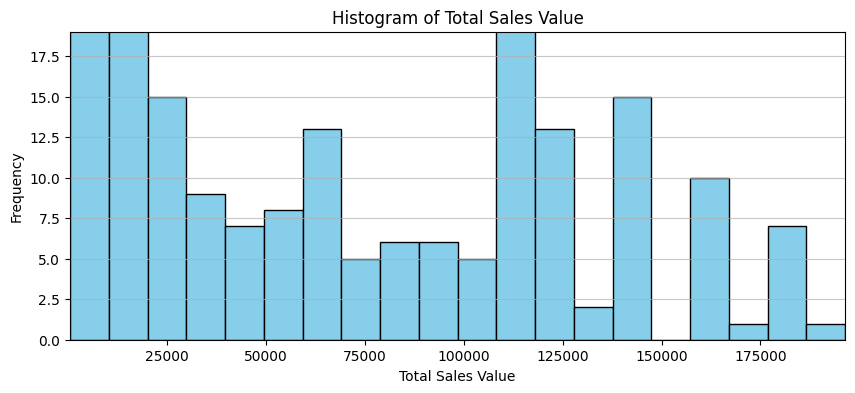

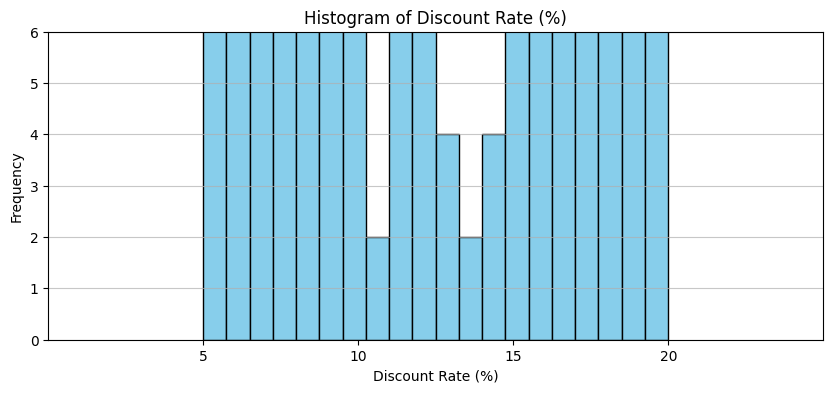

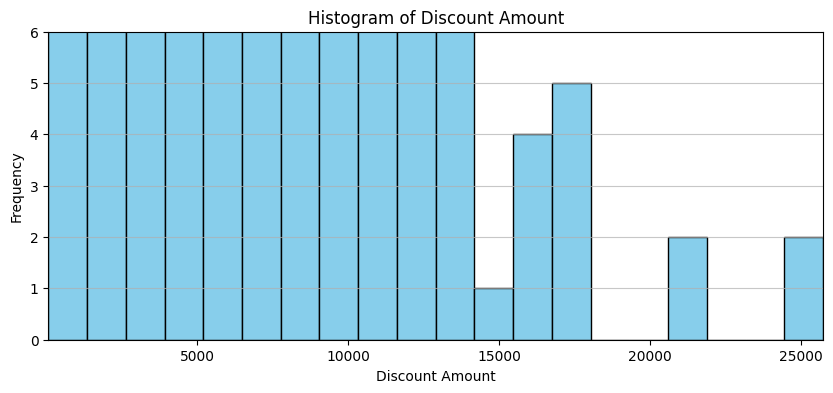

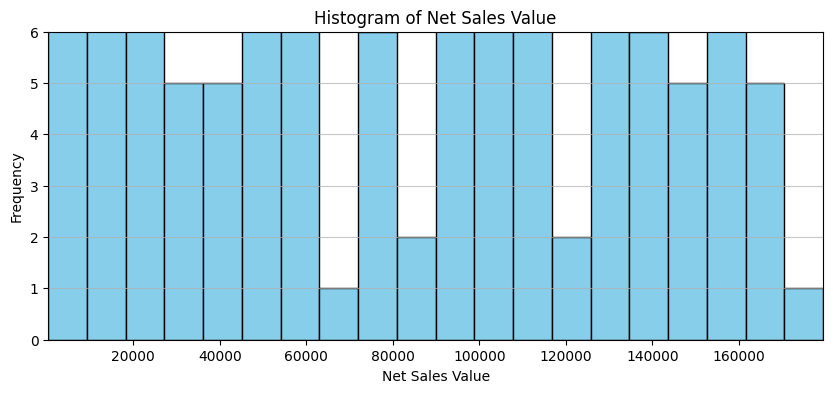

In [17]:
for col in num_cols:
    fig = plt.figure(figsize=(10,4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlim(df[col].min() - 5, df[col].max() + 5)   
    plt.ylim(0, df[col].value_counts().max() + 5)  
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.grid(axis='y', alpha=0.7)
    plt.show()

In [18]:
df[num_cols].skew()

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

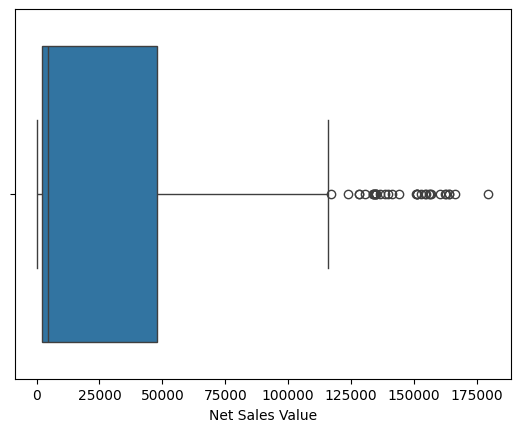

In [25]:
sns.boxplot(x=df[col])
plt.show()


From the plots, it was observed the data is spread. Most of the columns show a right-skewed distribution, meaning smaller values are more common and larger values are fewer. Some columns are almost normal, showing a balanced spread of data.

A few outliers were found, seen as separate bars away from the main group of data. These are extreme values that can affect the average of the data.

Inference:

Overall, the data is mostly right-skewed and contains some outliers. This shows that the data is not perfectly symmetrical and Handling outliers appropriately can also improve the accuracy and reliability of further analysis.

●	Box Plots:

--> Create boxplots for numerical variables to identify outliers and the interquartile range.      
--> Discuss any findings, such as extreme values or unusual distributions.


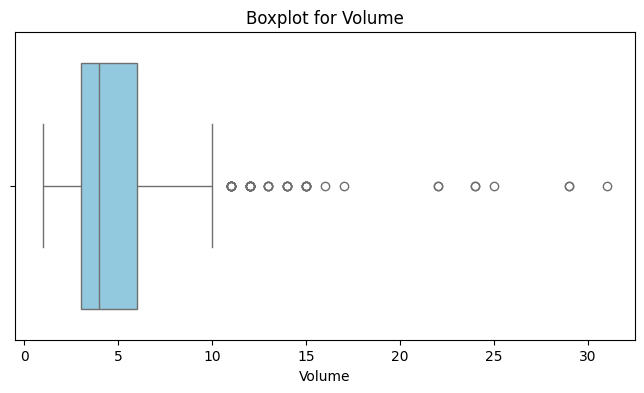

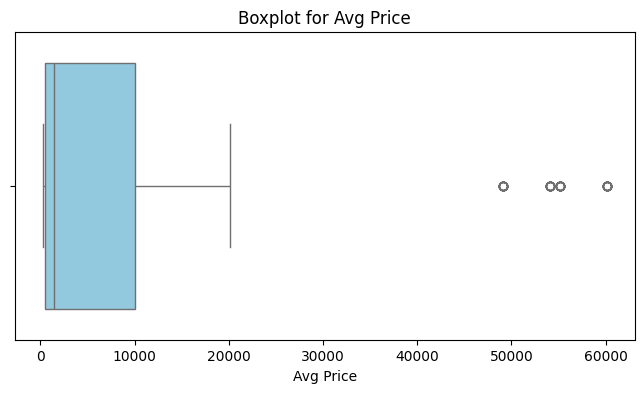

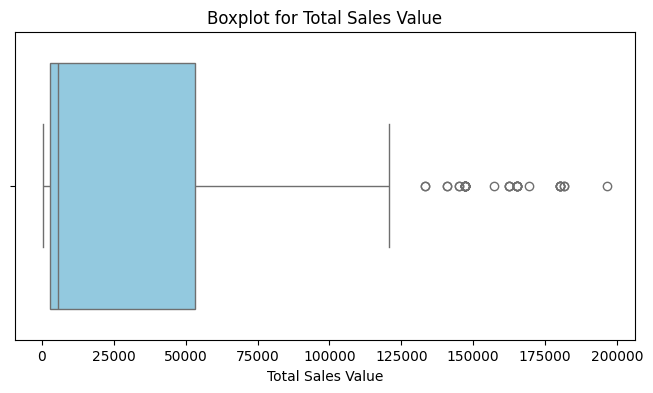

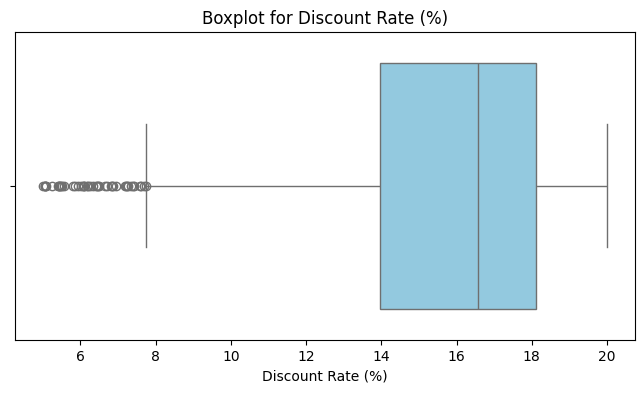

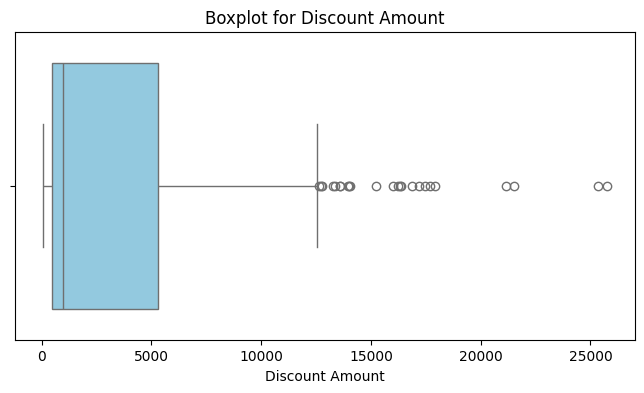

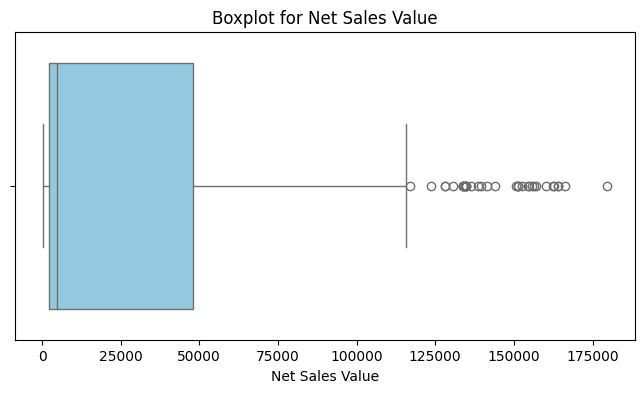

In [23]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

From the boxplots of all numerical variables in the dataset,

* Outliers: Some columns, like discount_percentage and sales_amount, have dots outside the boxplot whiskers, which probably means there are some unusual or extreme values.                  
                                                
* IQR (Interquartile Range): The box covers the middle 50% of the data (from Q1 to Q3). A taller box means the values are more spread out.                     
                                           
* Unusual Distributions: If the median line isn’t in the middle of the box, it shows the data is skewed. For example, if it’s closer to the bottom, it’s likely right-skewed.

●	Bar Chart Analysis for Categorical Column:

--> Identify categorical columns in the dataset.         
--> Create bar charts to visualize the frequency or count of each category.         
--> Analyze the distribution of categories and provide insights.       


In [26]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns are:", list(cat_cols))

Categorical columns are: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


C:\Users\kanch\AppData\Local\Temp\ipykernel_9092\492408631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


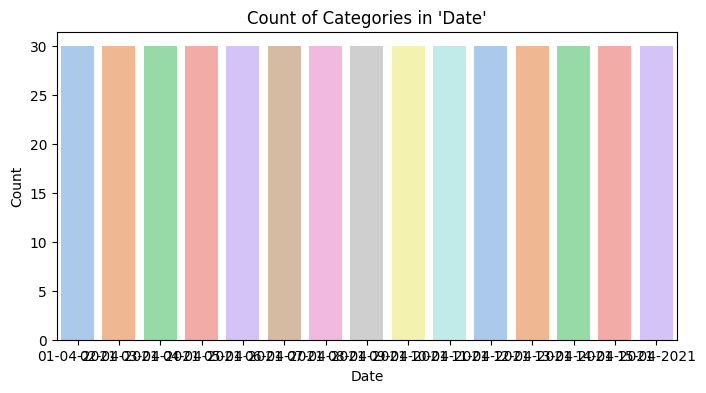

C:\Users\kanch\AppData\Local\Temp\ipykernel_9092\492408631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


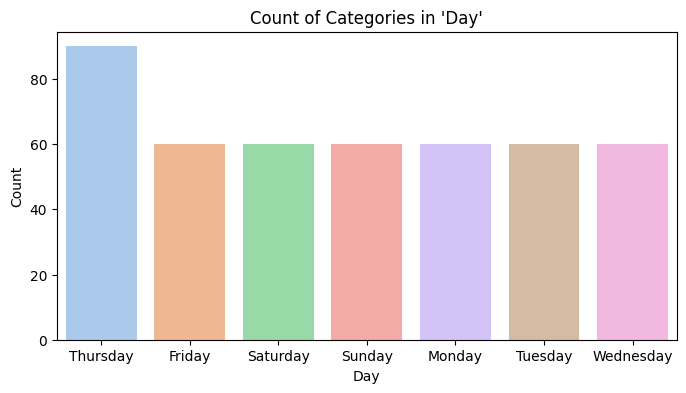

C:\Users\kanch\AppData\Local\Temp\ipykernel_9092\492408631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


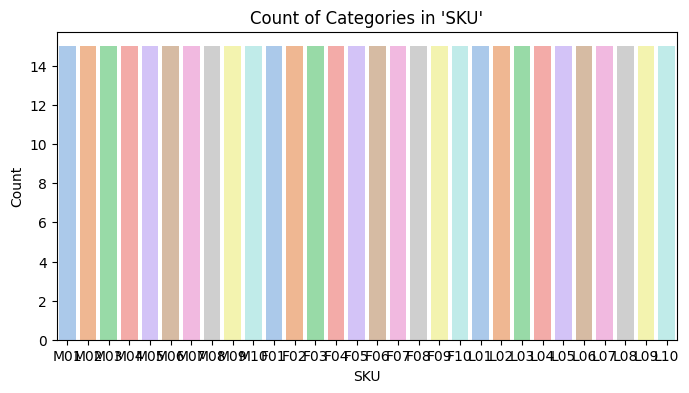

C:\Users\kanch\AppData\Local\Temp\ipykernel_9092\492408631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


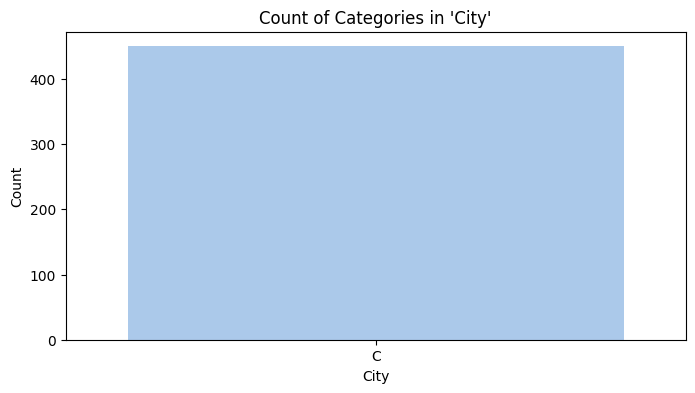

C:\Users\kanch\AppData\Local\Temp\ipykernel_9092\492408631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


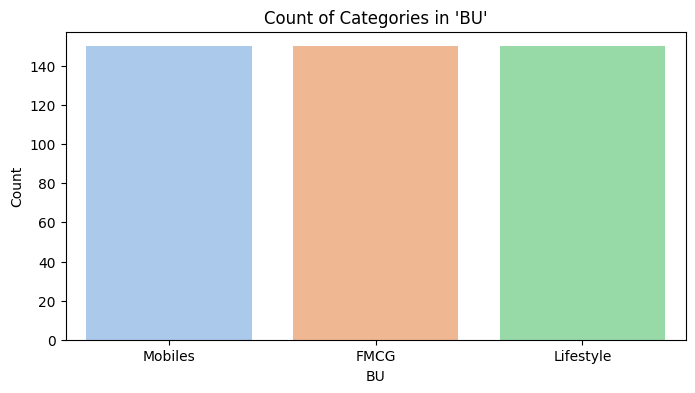

C:\Users\kanch\AppData\Local\Temp\ipykernel_9092\492408631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


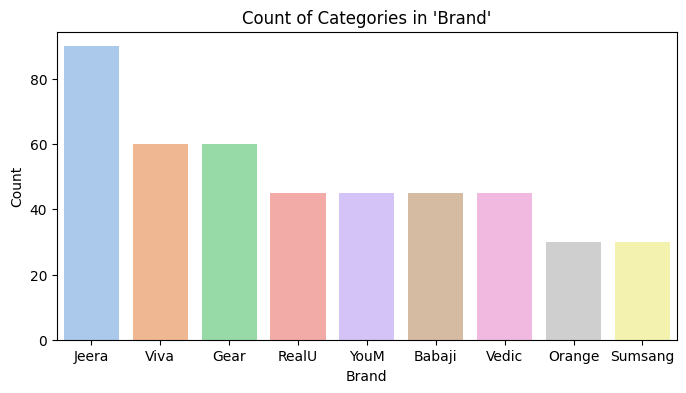

C:\Users\kanch\AppData\Local\Temp\ipykernel_9092\492408631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


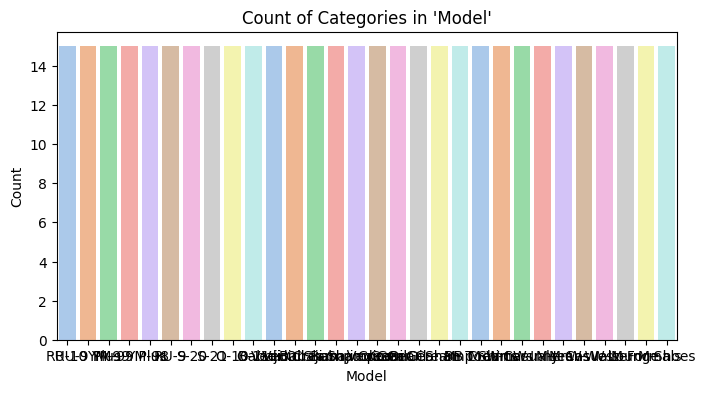

In [31]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')
    plt.title(f"Count of Categories in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count") 
    plt.show()

Categorical Distribution Analysis                 
                            
1. Category Frequencies:                                                             
Looking at the bar charts, some categories show up way more than others. For example, in product_category, a few products are sold a lot, while others barely appear. This means the data is kind of skewed, with a few categories dominating.
                                 
2. Rare Categories:                                                  
Some categories have very few entries. These could be niche items or just less common, and we might consider grouping them with similar ones to make analysis easier.
                            
3. Trends and Patterns:                                                     
Certain columns, like time, location, or user type, show clear patterns. For instance, some months might have more sales or some regions might be more active.
                                             
* Popular categories show what’s selling the most or which regions/customers are most active.      
                                                  
* Rare categories can highlight underperforming areas.                   
                     
* Skewed distributions should be kept in mind during modeling since they can affect predictions.

Conclusion

●	Summarize the key findings from the descriptive analytics and data visualizations.

1. Numerical Data Analysis:                        
                         
* Several numerical columns, such as sales_amount and discount_percentage, have outliers that fall outside the typical range.
                                         
* The IQR (interquartile range) shows that some variables have high variability, while others are more concentrated around the median.               
                       
* Many numerical variables are skewed, often right-skewed, indicating that extreme high values occur less frequently but can impact averages.               
                          
2. Categorical Data Analysis:                          
                                          
* Some categories appear much more frequently than others, showing a skewed distribution in categorical columns like product_category or region.                       
                                 
* A few rare categories exist, which may represent niche items or underrepresented groups.
                                          
* The distributions reveal patterns, such as popular products, active regions, or dominant customer types. 

Overall,
Outliers and skewed data should be kept in mind when doing analysis or predictions.
Categories that appear a lot show the main trends, while rare ones may need extra attention.
The charts help quickly see patterns, unusual values, and areas that might need more focus.